In [1]:
from imports import *
import seaborn as sns

In [2]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps.read_dataframe(df,'enter','leave')

df.shape

(1229, 3)

<AxesSubplot:>

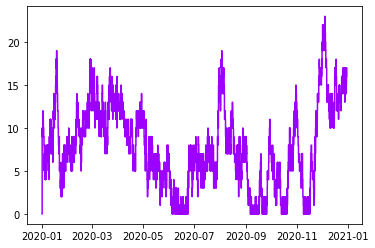

In [3]:
vsteps.plot()

In [4]:
data = vsteps.step_keys()
dt_deltas = np.diff(data)
dt_deltas = [d.total_seconds()/60 for d in dt_deltas]


<AxesSubplot:ylabel='Count'>

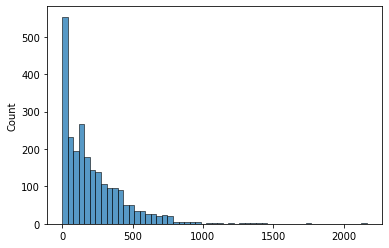

In [5]:
sns.histplot(x=dt_deltas)

<AxesSubplot:>

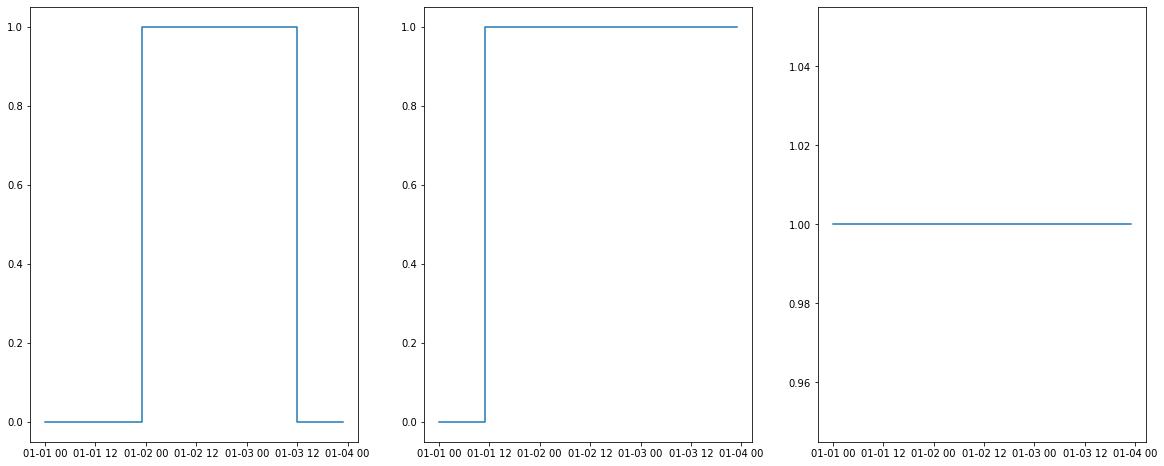

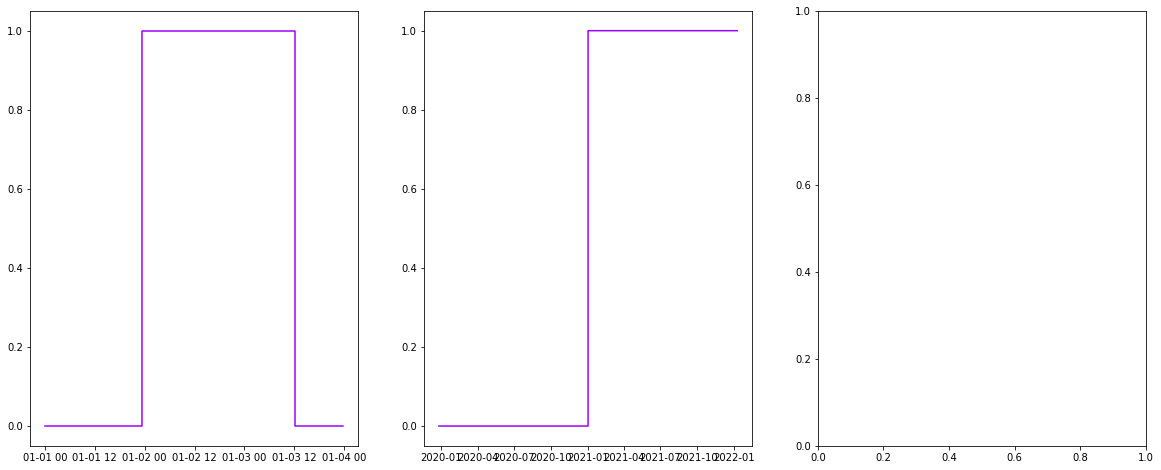

In [8]:
t = np.arange(pd.Timestamp(2021,1,1),pd.Timestamp(2021,1,4),pd.Timedelta(hours=1)).astype(pd.Timestamp)

fig,ax = plt.subplots(ncols=3, figsize=(20,8))
fig2,ax2 = plt.subplots(ncols=3, figsize=(20,8))

s1 = Step(use_datetime=True)
s2 = Step(pd.Timestamp(2021,1,1,12,15),pd.Timestamp(2021,1,3,1,5))
s3 = Step(pd.Timestamp(2021,1,1,1))

ax[0].step(t,s2(t))
ax[1].step(t,s3(t))
ax[2].step(t,s1(t))

s2.plot(plot_range=(pd.Timestamp(2021,1,1),pd.Timestamp(2021,1,4)),ax=ax2[0])
s3.plot(ax=ax2[1])
#s1.plot(ax=ax2[2])
#s2.plot()